# Ideal mixing: z-curve
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/cghiaus/economizer-fdd/HEAD?urlpath=%2Fdoc%2Ftree%2F%2Fideal_mix.ipynb)

In [1]:
import economizer

## Mixing process

![Alt text](economizer.png)
> Figure 1. Economizer (Welty, Ortiz 2020).

The __cooling coil__ cools and dehumidifies the incoming air (typically 55 °F, 13 °C).

The __pre-heating coil__ heats the mixed air to a minimum temperature (typically 45–55 °F, 7–13 °C) before it reaches the cooling coil to prevent freezing during cold weather.

The __economizer__ blends outdoor and return air, of temperature $\theta_o$ and $\theta_r$, respectively, controlled by dampers (on outdoor air, recirculated air and exhaust air). The aim is to maintain the mixed air telperature a few degrees above the cooling coil setpoint (58–62 °F, 14–17 °C) and to use outdoor air for free-cooling. The __mixing process__ in the economizer has the mixing ratio of outdoor air $ \alpha \in (0, 1)$.

![Alt text](mix_proces.svg)
> Figure 2. Mixing process in economizer.


The mixed air temperature is a linear function of outdoor temperature,

$$\theta_m = \alpha \theta_o + (1 - \alpha) \theta_r$$

that goes through the point $(\theta_r, \theta_r)$ and has the slope $\alpha$.

Since $\alpha \in (0, 1)$., the line of $\theta_m$ lies between the the horizontal line for $\alpha = 0$ and the 1st bisectrix for $\alpha = 1$.

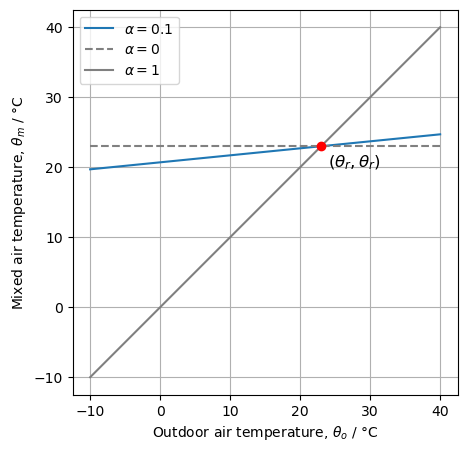

In [2]:
α = 0.10    # 100 %, outdoor air mixing rate
θr = 23     # °C, return air temperature
economizer.mix_process(α, θr, [-10, 40])

> Figure 2. The mixed air temperature is a linear function of outdoor temperature that goes through the point $(\theta_r, \theta_r)$, where \theta_r is the return air temperature, and has the slope $\alpha \in (0, 1)$.

## Perfect economizer

### Control algorithm of mix air temperature

The mixed air temperature, $\theta_m$, is a pice-wise function on the domain of tempeature variation, $\theta_o \in (\theta_{o,min}; \theta_{o,max})$ as a function of:

- $\theta_B$: __Balance point temperature__ (or _base temperature_): outdoor dry-bulb temperature for which the internal heat gains (occupants, lights, equipment) offset transmission losses through the building envelope, resulting in zero heating or cooling demand. The base temperature is usually different for heating and for cooling. In the interval between the heating and cooling base temperatures the building is in __free running__.

- $\theta_M$: __Mixed air temperature setpoint in free-cooling__: the target temperature of the mixed air, controlled by economizer dampers. It is often set a few degrees above the cooling coil setpoint (58–62 °F, 14–17 °C).

- $\theta_L$: __Outdoor dry‑bulb limit setpoint__: the high‑limit of the outdoor air dry‑bulb temperature above which the economizer is disabled or restricted to minimum outdoor air only (typically 65–75 °F, 18–24 °C).

- $\theta_r$: __Return air temperature__: the temperature of the air returning from the zones back to the AHU, typically close to the space setpoint plus duct gains (typically 72–78 °F, 22–26 °C during cooling, and 68–74 °F, 20–23 °C during heating).

- $\alpha$ : __percentage of outdoor air__ in the mix air (between 0 and 1).

The pice-wise function variation $\theta_m = f(\theta_o$ is defined on the following domains:

1.	__Heating__ with minimum outdoor air rate flow for  $\theta_o \in [\theta_{o,min}, \theta_{Bh}]:$
$$\theta_m = \alpha \theta_o + (1 - \alpha) \theta_r$$

2. __Free running__ with variable outdoor air flow rate for $\theta_o \in [\theta_{Bh}; \theta_{Bc}]:$
$$\theta_m = y_0 + \frac{y_1−y_0}{x_1−x_0}(x−x_0)$$

where:
   - $x_0 = \theta_{Bh}$
   - $y_0 = \alpha \theta_{Bh} + (1-\alpha) \theta_{rh}$
   - $x_1 = \theta_{Bc}$
   - $y_1$ is the lowest value of $\theta_m$ in controlled free-cooling.

3.	__Controlled free-cooling__ for $\theta_o \in [\theta_{Bc}; \theta_M]:$ 
   - if $\theta_{Bc} > \theta_C = \frac{1}{\alpha } (\theta_M - (1-\alpha)\theta_{rc})$, the mixed air is controlleed at the mixed air setpoint, $\theta_M$ for all $\theta_o \in [\theta_{Bc}; \theta_M]:$ 
    - else,
        - for $\theta_o \in [\theta_B; \theta_C]$, the outdoor air is at minimum rate $\theta_m = \alpha \theta_o + (1 - \alpha) \theta_{rc};$
        - for $\theta_o \in [\theta_C; \theta_M]$, the mixed air is controlleed at the mixed air setpoint, $\theta_M.$

4.	__Free-cooling with 100 % oudoor air__, $\theta_m =  \theta_o$, for $\theta_o \in [\theta_M, \theta_L].$

5.	__Mechanical cooling__ for $\theta_m \in [\theta_L; \theta_{max}]$, with minimum outdoor air rate, $\theta_m = \alpha \theta_o + (1 - \alpha) \theta_r;$

### Examples of perfect mix air control

#### Low outdoor air ratio

Usually, the _free-running_ is followed by _controlled free-cooling_ (the mix air temperature is at setpoint for cooling, $\theta_M$. 

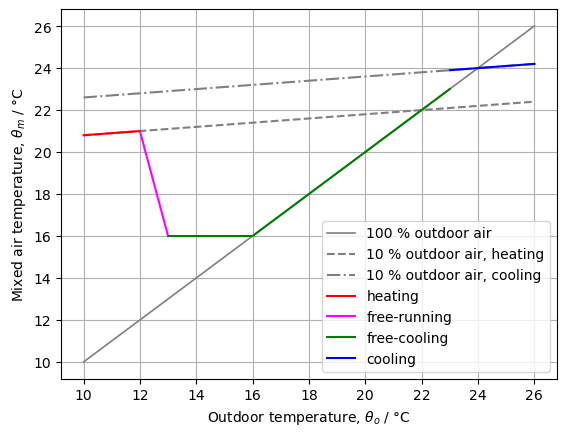

In [3]:
θo = [10, 26, 0.01]     # °C, Outdoor temperarure from min to max with step dθo
θB = [12, 13]           # °C, Base temperature for heating θBh and cooling θBc
θM = 16.                # °C, Mixed air temperature setpoint in free-cooling
θL = 23.                # °C, Outdoor dry‑bulb limit setpoint for free-cooling
θr = [22, 24]           # °C,, Return air temperature for heating and cooling
α = 0.1                 # α ∈ [0, 1], Ratio of outdoor air in the mixed air

df_θm = economizer.ideal_mix_temp(θo, θB, θM, θL, θr, α)
economizer.plot_ideal_mix_temp(df_θm)


> Figure 3. Perfect mix air as a function of outdoor air temperature: the  free-cooling domain starts with controlles mix air temperature $\theta_M$. 

#### High outdoor air ratio

If the ratio of outdoor air is large, the _free-running_ may be followed by a regime in which the mix air temperature is lower than the setpoint for coling, $\theta_M$. In this case, the mix air needs to be heated to $\theta_M$. 

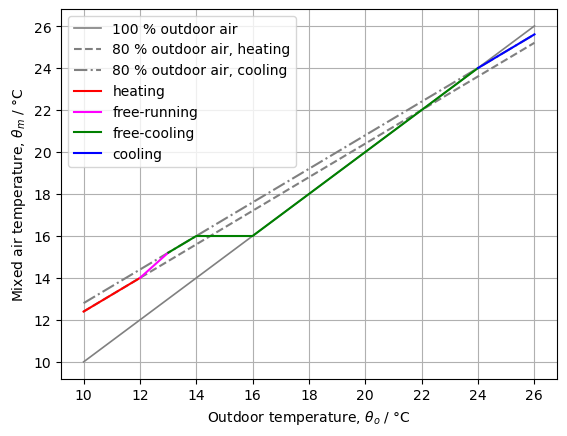

In [4]:
θo = [10, 26, 0.01]     # °C, Outdoor temperarure from min to max with step dθo
θB = [12, 13]           # °C, Base temperature for heating θBh and cooling θBc
θM = 16.                # °C, Mixed air temperature setpoint in free-cooling
θL = 24.                # °C, Outdoor dry‑bulb limit setpoint for free-cooling
θr = [22, 24]           # °C,, Return air temperature for heating and cooling
α = 0.8                 # α ∈ [0, 1], Ratio of outdoor air in the mixed air

df_θm = economizer.ideal_mix_temp(θo, θB, θM, θL, θr, α)
economizer.plot_ideal_mix_temp(df_θm)

> Figure 4. Perfect mix air as a function of outdoor air temperature: the free-cooling domain starts with minimum outdoor air airflow rate. Since $\theta_m < \theta_M$, the mixed air needs to be heated to $\theta_M$.

### Mixing ratio

If the command of the dampers is linearized, the ratio of the outdoor air in the mixing air corresponds to the commmand to the damper, _u_.

The damper command is:

$$ u = \frac{\theta_m - \theta_{rh}}{\theta_o - \theta_{rh}} $$
if the process is heating,

$$ u = \frac{\theta_m - \theta_{rc}}{\theta_o - \theta_{rc}} $$
if the process is free-cooling or cooling,

where:
- $\theta_m$ is the mixed air temperature;
- $\theta_o$ is the outdoor temperature;
- $\theta_{rh}$ and $\theta_{rc}$ are the return temperature (equal to indoor temperature) in heating and cooling, respectively.

For the “free-running” process,
$$u = \frac{\theta_m - \theta_r}{\theta_o - \theta_r}$$

where $\theta_r$ varies linearly from $\theta_{rh}$ to $\theta_{rc}$.


### Examples of perfect mix air control

#### Low outdoor air ratio

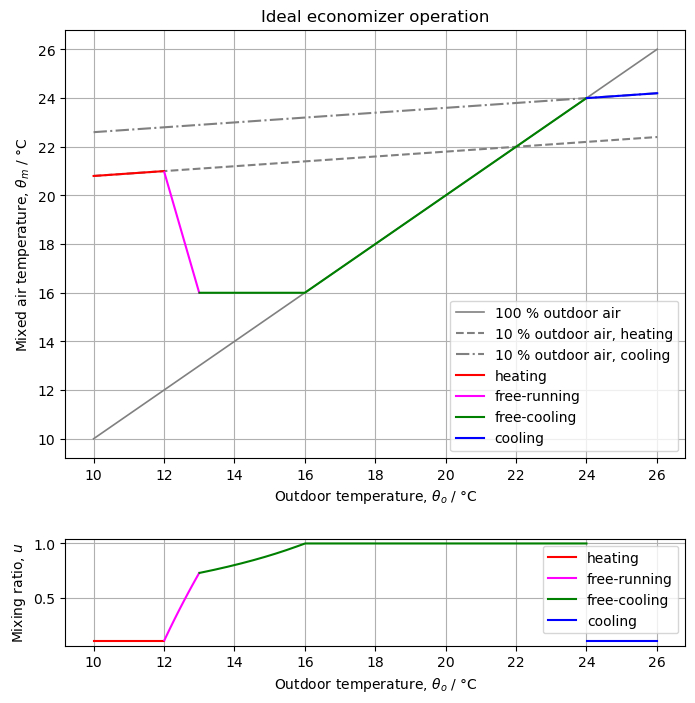

In [5]:
θo = [10, 26, 0.01]     # °C, Outdoor temperarure from min to max with step dθo
θB = [12, 13]           # °C, Base temperature for heating θBh and cooling θBc
θM = 16.                # °C, Mixed air temperature setpoint in free-cooling
θL = 24.                # °C, Outdoor dry‑bulb limit setpoint for free-cooling
θr = [22, 24]           # °C,, Return air temperature for heating and cooling
α = 0.1                 # α ∈ [0, 1], Ratio of outdoor air in the mixed air

df_θm = economizer.ideal_mix_temp(θo, θB, θM, θL, θr, α)
df_u = economizer.mix_ratio(df_θm)
economizer.plot_mix_temp_ratio(df_θm, df_u)

> Figure 5. Perfect mix air as a function of outdoor air temperature. a) Mix air temperature. b) Command for mixing damper.

#### High outdoor air ratio

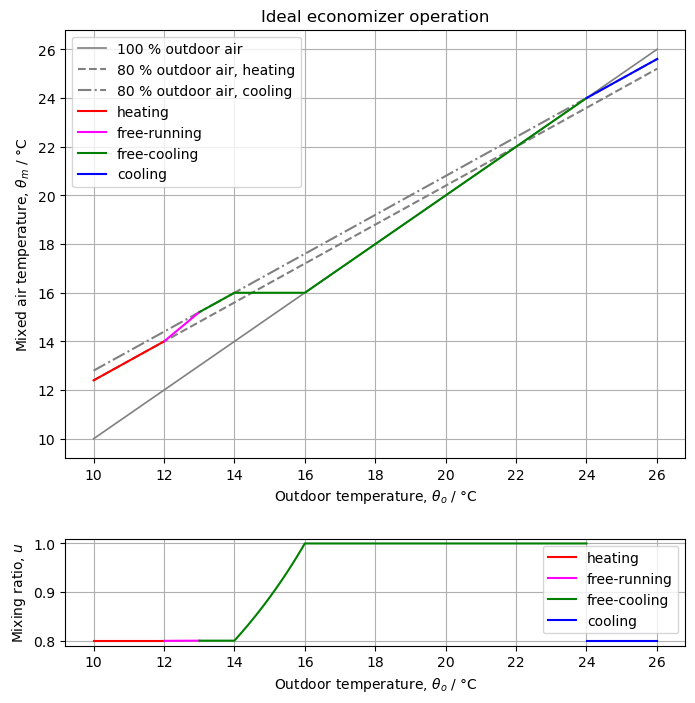

In [6]:
α = 0.8                 # α ∈ [0, 1], Ratio of outdoor air in the mixed air

df_θm = economizer.ideal_mix_temp(θo, θB, θM, θL, θr, α)
df_u = economizer.mix_ratio(df_θm)
economizer.plot_mix_temp_ratio(df_θm, df_u)

> Figure 6. Perfect mix air as a function of outdoor air temperature. a) Mix air temperature. b) Command for mixing damper. Note that the free-running and free-cooling are at minimum flow rate. The mixed air has a temperature lower than its setpoint; it needs to be heatead at $\theta_M$.

#### Large difference between indoor air temperature setpoints

If the difference between return air (i.e. indoor air setpoint) temperatures is large, then the _controlled free-cooling_ may not occur.

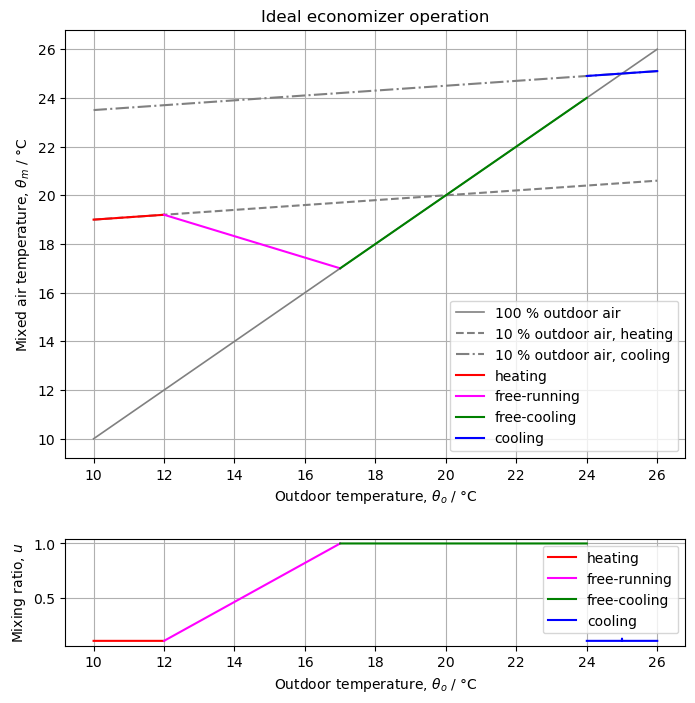

In [7]:
θo = [10, 26, 0.001]    # °C, Outdoor temperarure from min to max with step dθo
θB = [12, 17]           # °C, Base temperature for heating θBh and cooling θBc
θM = 17.                # °C, Mixed air temperature setpoint in free-cooling
θL = 24.                # °C, Outdoor dry‑bulb limit setpoint for free-cooling
θr = [20, 25]           # °C,, Return air temperature for heating and cooling
α = 0.1                 # α ∈ [0, 1], Ratio of outdoor air in the mixed air

df_θm = economizer.ideal_mix_temp(θo, θB, θM, θL, θr, α)
df_u = economizer.mix_ratio(df_θm)
economizer.plot_mix_temp_ratio(df_θm, df_u)

> Figure 6. _Controlled free-cooling_ may not occur.

## References

[Sellers, D. (2022)](https://www.av8rdas.com/uploads/1/0/3/2/103277290/print_engineers_notebook_sellers_april_2022.pdf) The Perfect Economizer, _ASHRAE Journal_, 64(4).

[Seem, J.E., Park, C., House J.M. (1999)](https://tsapps.nist.gov/publication/get_pdf.cfm?pub_id=860756) A new sequencing control strategy for air-handling units, _HVAC&R Research_, 5(1), 35-58.

[Welty, S., Ortiz, R. (2020)](https://www.researchgate.net/publication/348236291_How_Effective_Are_Mixing_Boxes_At_Performing_the_Economizer_Function) How Effective Are Mixing Boxes At Performing the Economizer Function? _ASHRAE Journal_, 62(12), 22-29